# Gradient Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio

import pylandstats as pls

In [2]:
URBAN_CLASS_VAL = 1
input_filepath = 'data/clc/vaud_g100_clc00_V18_5.tif'

## Initializing an analysis instance from a list of mask arrays

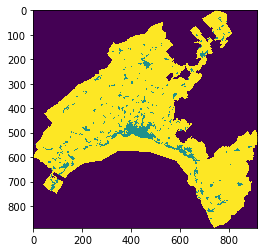

In [3]:
with rasterio.open(input_filepath) as src:
    plt.imshow(src.read(1))

In [3]:
masks_arr = np.load('data/masks_arr.npy')

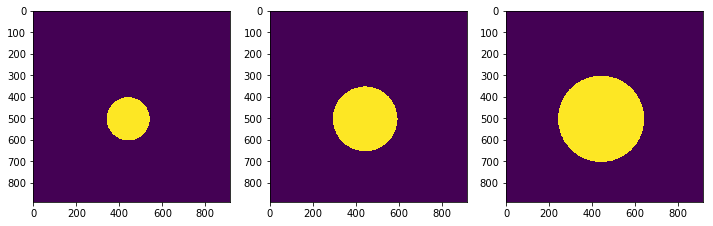

In [9]:
num_subplots = len(buffer_masks_arr)
fig = plt.figure(figsize=(num_subplots * 4, 4))

for i in range(num_subplots):
    ax = fig.add_subplot(1, num_subplots, i + 1)
    ax.imshow(buffer_masks_arr[i])

In [4]:
ba = pls.GradientAnalysis(input_filepath, masks_arr=buffer_masks_arr)

AttributeError: module 'pylandstats' has no attribute 'GradientAnalysis'

(<Figure size 1296x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c1234bac8>,
       dtype=object))

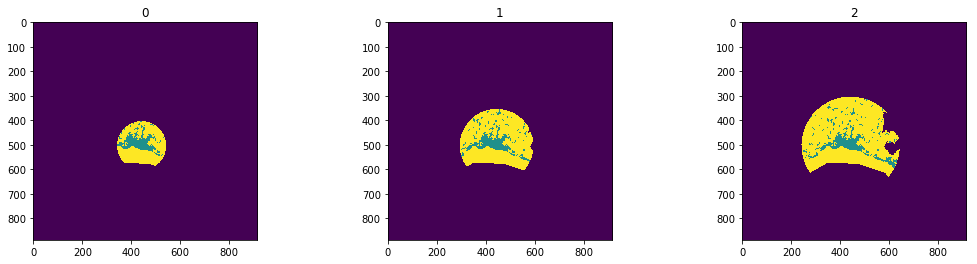

In [11]:
ba.plot_landscapes()

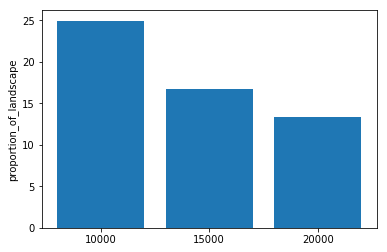

In [40]:
ba.plot_metric('proportion_of_landscape', class_val=URBAN_CLASS_VAL)

## Buffer Analysis

In [33]:
row, col

(503, 442)

### From Point

In [2]:
from shapely.geometry import Point

base_mask = Point(6.6327025, 46.5218269)

In [35]:
ba = pls.BufferAnalysis(input_filepath, base_mask, [10000, 15000, 20000], base_mask_crs={'init':'epsg:4326'})

(<Figure size 1296x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bff1c34e0>,
       dtype=object))

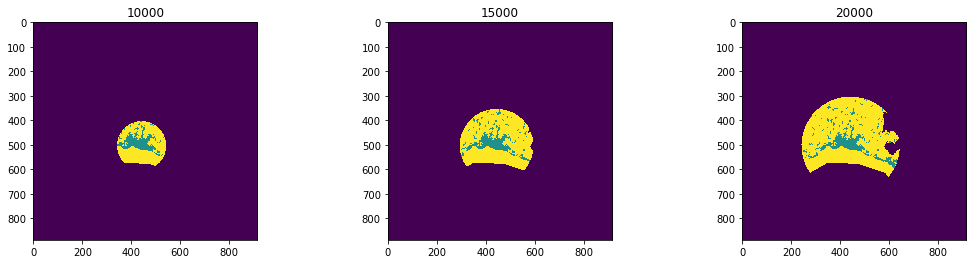

In [36]:
ba.plot_landscapes()

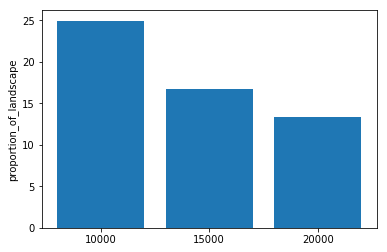

In [44]:
ba.plot_metric('proportion_of_landscape', class_val=URBAN_CLASS_VAL)

### From Polygon

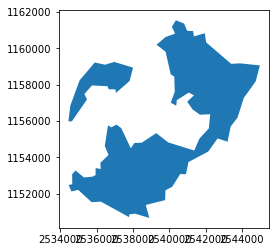

In [25]:
import geopandas as gpd

gdf = gpd.read_file('data/gmb/g1a18.shp')
base_mask = gdf[gdf['GMDNAME'] == 'Lausanne']['geometry']
base_mask.plot()

In [31]:
base_mask.copy()

733    (POLYGON ((2536972 1159245, 2537935 1158955, 2...
Name: geometry, dtype: object

In [27]:
base_mask.to_crs({'init': 'epsg:2056'})

733    (POLYGON ((2536972 1159244.999999999, 2537935 ...
Name: geometry, dtype: object

In [23]:
base_mask = gpd.GeoSeries([gdf[gdf['GMDNAME'] == 'Lausanne']['geometry'].iloc[0]])

In [24]:
base_mask.crs

In [20]:
ba = pls.BufferAnalysis(input_filepath, base_mask, [0, 5000, 10000])

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

(<Figure size 1296x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b5286d0b8>,
       dtype=object))

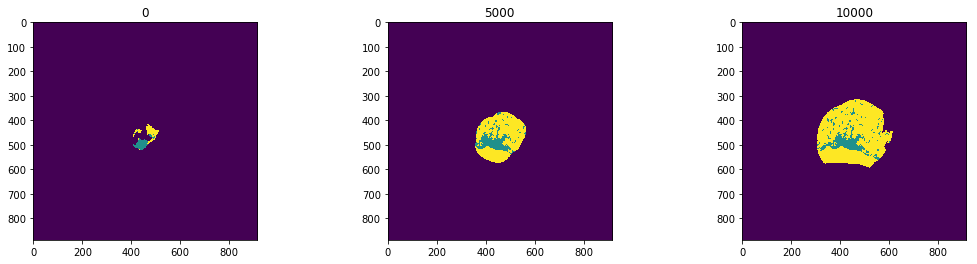

In [5]:
ba.plot_landscapes()

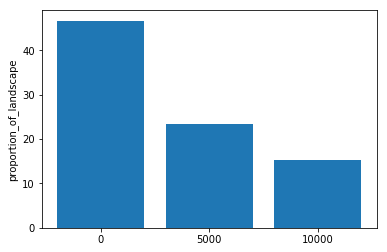

In [6]:
ba.plot_metric('proportion_of_landscape', class_val=URBAN_CLASS_VAL)

EPSG:3035


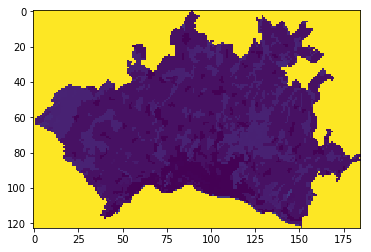

In [11]:
with rasterio.open('../research_notebooks/swiss-urbanization/src/pylandstats/tests/input_data/ls250_06.tif') as src:
    plt.imshow(src.read(1))
    print(src.crs)
    transform = src.transform

In [7]:
ba = pls.BufferAnalysis('../research_notebooks/swiss-urbanization/src/pylandstats/tests/input_data/ls250_06.tif', base_mask, [10000, 15000, 20000], base_mask_crs={'init':'epsg:4326'})

(<Figure size 1296x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37aa035da0>,
       dtype=object))

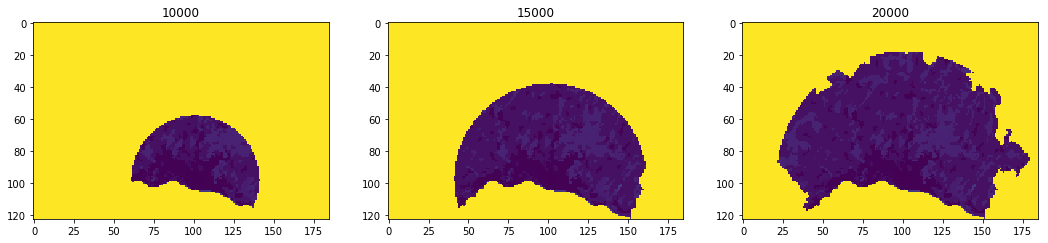

In [8]:
ba.plot_landscapes()

In [46]:
ba.masks_arr.dump('../research_notebooks/swiss-urbanization/src/pylandstats/tests/input_data/masks_arr.npy')

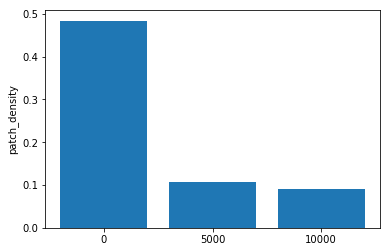

In [7]:
ax = ba.plot_metric('patch_density')

In [33]:
landscapes = [
            pls.Landscape(np.load(fp), res=(250, 250)) for fp in
            ['../research_notebooks/swiss-urbanization/src/pylandstats/tests/input_data/ls250_06.npy', '../research_notebooks/swiss-urbanization/src/pylandstats/tests/input_data/ls250_12.npy']
]
sta = pls.SpatioTemporalAnalysis(landscapes)

In [ ]:
# base_landscape_fp = '../research_notebooks/swiss-urbanization/src/pylandstats/tests/input_data/{}'
# pls.SpatioTemporalAnalysis([base_landscape_fp.format(raster_fp) for raster_fp in ['ls250_06.tif'